# Кейс-стади

Булыгин Олег:  
* [LinkedIn](linkedin.com/in/obulygin)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)

# [Игнац Филипп Земмельвейс (1818-1865)](https://ru.wikipedia.org/wiki/%D0%97%D0%B5%D0%BC%D0%BC%D0%B5%D0%BB%D1%8C%D0%B2%D0%B5%D0%B9%D1%81,_%D0%98%D0%B3%D0%BD%D0%B0%D1%86_%D0%A4%D0%B8%D0%BB%D0%B8%D0%BF%D0%BF)
Венгерский врач-акушер, профессор, получивший прозвище «спаситель матерей» за обнаружение причин родильной горячки.
![title](https://www.krugosvet.ru/sites/krugosvet.ru/files/img03/1003658_7373_001.jpg)

В больнице, в которой работал наш герой, из-за большой загрузки решено было разделить акушерское отделение на две клиники.

Земмельвейс составил таблицу, в которую вносил все данные о поступивших в 1-ю и 2-ю клинику пациентках. Вот эти данные:

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
# !pip install sklearn
import sklearn.utils as sku

In [82]:
# death_rates = pd.read_csv('https://raw.githubusercontent.com/obulygin/netology_pyda_files/main/death_rates_before.csv')
death_rates = pd.read_csv('/Users/velo1/SynologyDrive/GIT_syno/data/death_rates_before.csv')
death_rates

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


Он выяснил, что за последние шесть лет в первом отделении умерло почти 2000 женщин, а во втором — 700. 

In [83]:
death_rates.groupby('clinic').sum()

,year,births,deaths
clinic,,,
clinic 1,11061,20042,1989
clinic 2,11061,17791,691


In [ ]:
# death_rates.pivot_table('deaths', aggfunc='sum',columns=['clinic'], fill_value= 'deaths')

`Feature engineering`

In [84]:
# посчитаем относительную смертность для каждой больницы
death_rates['death_rate2'] = death_rates.deaths / (death_rates.births + death_rates.deaths)
death_rates['death_odds'] = death_rates.deaths / death_rates.births 
death_rates

,year,births,deaths,clinic,death_rate2,death_odds
0,1841,3036,237,clinic 1,0.072411,0.078063
1,1842,3287,518,clinic 1,0.136137,0.157591
2,1843,3060,274,clinic 1,0.082184,0.089542
3,1844,3157,260,clinic 1,0.076090,0.082357
4,1845,3492,241,clinic 1,0.064559,0.069015
5,1846,4010,459,clinic 1,0.102708,0.114464
6,1841,2442,86,clinic 2,0.034019,0.035217
7,1842,2659,202,clinic 2,0.070605,0.075968
8,1843,2739,164,clinic 2,0.056493,0.059876
9,1844,2956,68,clinic 2,0.022487,0.023004


In [85]:
death_rates.groupby('clinic').mean()

,year,births,deaths,death_rate2,death_odds
clinic,,,,,
clinic 1,1843.5,3340.333333,331.500000,0.089015,0.098505
clinic 2,1843.5,2965.166667,115.166667,0.038462,0.040400


<AxesSubplot: xlabel='year', ylabel='death_rate2'>

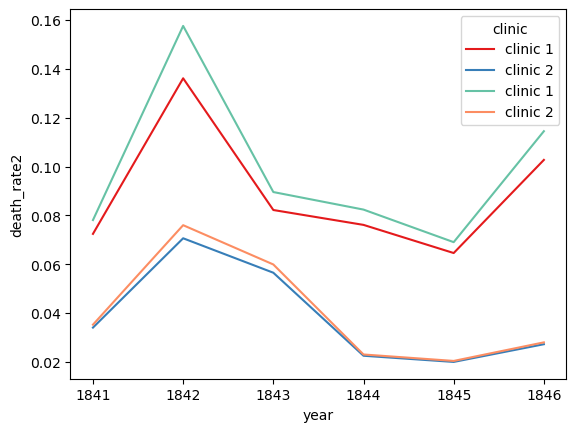

In [92]:
# визуализируем смертность
sns.lineplot(x='year', y='death_rate2', hue='clinic', data=death_rates, palette= 'Set1')
sns.lineplot(x='year', y='death_odds', hue='clinic', data=death_rates, palette= 'Set2')

В попытках приблизить условия в 1-м отделении ко 2-му, он начал копировать в мельчайших нюансах применяемую там технику:  
* давать женщинам рожать в позе лёжа на боку, а не на спине,  
* переносить их в палаты после родов, а не заставлять идти самостоятельно;  
* Земмельвейс также увеличил контроль за вентиляцией палат  
* и изменил подход к распределению лекарств.  

Все эти усилия оказались тщетными.

In [93]:
# помесячные данные о смертности в проблемной больнице (уже до 49 года)
# death_rates_after = pd.read_csv('https://raw.githubusercontent.com/obulygin/netology_pyda_files/main/death_rates_after.csv', parse_dates=['date'])
death_rates_after = pd.read_csv('/Users/velo1/SynologyDrive/GIT_syno/data/death_rates_after.csv', parse_dates= [0])   #['date'])
# parse_dates:  dict [column] (default False)  
death_rates_after

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [ ]:
# death_rates_after.info()

In [94]:
# посчитаем RELATIVE смертность
death_rates_after['death_rate'] = death_rates_after.deaths / (death_rates_after.births + death_rates_after.deaths)
death_rates_after

,date,births,deaths,death_rate
0,1841-01-01,254,37,0.127148
1,1841-02-01,239,18,0.070039
2,1841-03-01,277,12,0.041522
3,1841-04-01,255,4,0.015444
4,1841-05-01,255,2,0.007782
...,...,...,...,...
93,1848-11-01,310,9,0.028213
94,1848-12-01,373,5,0.013228
95,1849-01-01,403,9,0.021845
96,1849-02-01,389,12,0.029925


Желая проверить распространённую в то время теорию, что родильную горячку вызывает эмоциональное потрясение у роженицы,  
Земмельвейс решил провести эксперимент — он пригласил священника, который каждый день с колоколом обходил палаты и соборовал умирающих.  
Лежащие на соседних койках женщины были в ужасе, однако на смертность это никак не повлияло.

К сожалению, числовых данных об этом эксперименте не сохранилось.

Но доктор все же сделал то, что привело к реальному изменению ситуации.

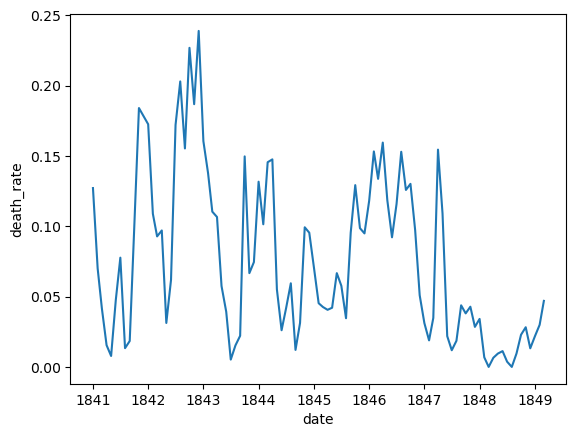

In [95]:
# визуализируем смертность. Когда были введены изменения?
sns.lineplot(x='date', y='death_rate', data=death_rates_after);

Земмельвейс уже давно обращал внимание, что после работы в анатомическом отделении от рук врачей и студентов шёл трупный запах,  
который оставался даже после мытья с мылом.  
В клинике Клейна каждую роженицу несколько раз осматривал врач и до 10 студентов,  
многие из которых могли до того работать в морге.  
Чтобы подтвердить свою гипотезу, в конце мая 1847 года Земмельвейс обязал персонал больницы  
перед манипуляциями с беременными и роженицами тщательно мыть руки в растворе хлорной извести,  
в том числе вычищать щёткой зоны под ногтями. Такой же обработке подвергали все инструменты.  
Кроме того, над кроватью каждой роженицы вешали табличку с именами врачей и студентов,  
которые с ней работали — так сразу обнаруживались ответственные за смерть пациентки.

Земмельвейс проверил свою гипотезу,  
а мы проверим свою:  
* действительно ли введенные им мероприятия статистчиески значимо изменили ситуацию 
* или это случайность?

In [96]:
important_date = pd.to_datetime('1847-06-01')
death_rates_after['important_date'] = death_rates_after.date.map(lambda x: 'before' if x < important_date else 'after')
death_rates_after

,date,births,deaths,death_rate,important_date
0,1841-01-01,254,37,0.127148,before
1,1841-02-01,239,18,0.070039,before
2,1841-03-01,277,12,0.041522,before
3,1841-04-01,255,4,0.015444,before
4,1841-05-01,255,2,0.007782,before
...,...,...,...,...,...
93,1848-11-01,310,9,0.028213,after
94,1848-12-01,373,5,0.013228,after
95,1849-01-01,403,9,0.021845,after
96,1849-02-01,389,12,0.029925,after


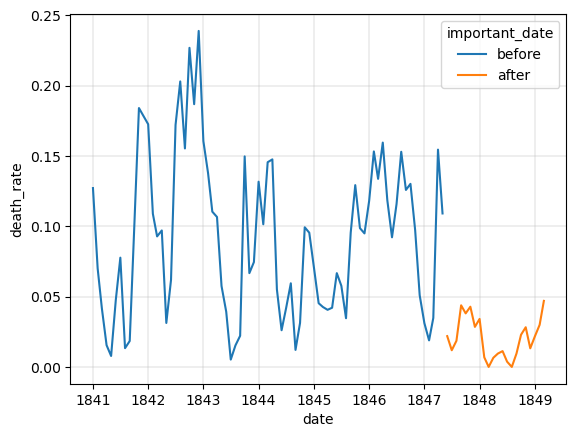

In [97]:
# отделим "до" от "после"
sns.lineplot(x='date', y='death_rate', hue='important_date', data=death_rates_after)
plt.grid(linewidth=.3);

In [99]:
death_rates_after.groupby('important_date').death_rate.count()
# number of observations

important_date
after     22
before    76
Name: death_rate, dtype: int64

In [101]:
# на какой процент смертность стала в среднем меньше?
by_event = death_rates_after.groupby('important_date').death_rate.mean()
# by_event = death_rates_after.groupby('important_date').mean().death_rate
by_event

important_date
after     0.020452
before    0.091526
Name: death_rate, dtype: float64

In [102]:
difference = by_event.after - by_event.before
difference

# а может это случайность?

-0.0710744368960572

## Доверительные интервалы на основе бутстрэпа

[Бутстрэп](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) – метод исследования распределения статистик, основанный на многократной генерации выборок на базе имеющейся выборки. Позволяет просто и быстро оценивать самые разные статистики. Бутстрэп используется для тестирования гипотез, построения доверительных интервалов. 

### Бутстрэповский доверительный интервал: алгоритм

Если у нас есть выборка и требуется оценить какой-либо параметр (в нашем случае разницу до-после), но мы не можем провести много экспериментов для повышения точности вывода, то мы можем набрать псевдовыборки из имеющихся данных и условиться, что каждая из них — как бы  результат повторения эксперимента. Размер псевдовыборок равен размеру настоящей выборки, но элементы отбираем случайно и "с возвращением", т.е. какие-то позиции из исходной выборки могут быть отобраны несколько раз, а какие-то могуть не попасть в нее вообще. Это нормально, т.к. псевдовыборок будет очень много.

Для каждой из псевдовыборок вычисляется нужный параметр, с помощью которых и строится доверительный интервал.


![title](https://yashuseth.files.wordpress.com/2017/12/bootstrap.png?w=1174&h=542)

In [103]:
death_rates_after.query(f'death_rate == {str(death_rates_after.death_rate.max())}')

,date,births,deaths,death_rate,important_date
22,1842-12-01,239,75,0.238854,before


In [104]:
death_rates_after.query(f'death_rate == {str(death_rates_after.death_rate.min())}')

,date,births,deaths,death_rate,important_date
85,1848-03-01,276,0,0.0,after
90,1848-08-01,261,0,0.0,after


*`bootsrap`*  
[ссылка](https://towardsdatascience.com/bootstrap-statistics-how-to-work-around-limitations-of-simple-statistical-tests-13180a301efd)

In [105]:
# генерируем как можно больше разниц показателей "до" и "после", случайно их выбирая
d_dif = []
bstrap_iter = 3000


In [106]:
for i in range(bstrap_iter):

    # sampling  and calculate MEANS.   REPLACE= TRUE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
    before = death_rates_after.query('important_date == "before"').sample(frac=1, replace= True).death_rate.mean()
    after = death_rates_after.query('important_date == "after"').sample(frac=1, replace= True).death_rate.mean()

    d_dif.append(before - after)

d_dif[:5]

[0.07854252975275104,
 0.06100727386275946,
 0.07056853931447385,
 0.08584426971993231,
 0.07209669060783677]

Реализация через sklearn

In [ ]:
# d_dif = []
# bstrap_iter = 1000
# for i in range(bstrap_iter):

#     before = sku.resample(death_rates_after.query('important_date == "before"').death_rate, replace=True, n_samples=int(76/5) )
#     after  = sku.resample(death_rates_after.query('important_date == "after"').death_rate, replace=True, n_samples=int(22/5) )

#     d_dif.append(before.mean() - after.mean())

# d_dif[:5]

In [107]:
max(d_dif), min(d_dif), np.std(d_dif)

(0.0981566011036508, 0.0500231929934456, 0.007120894168640109)

In [109]:
stats.shapiro(death_rates_after.death_rate)
# SOURCE data is non normal

ShapiroResult(statistic=0.9256917834281921, pvalue=3.4107557439710945e-05)

In [110]:
stats.shapiro(pd.Series(d_dif))
# bootstrap MEANS distr. is normal

ShapiroResult(statistic=0.9990909099578857, pvalue=0.12650273740291595)

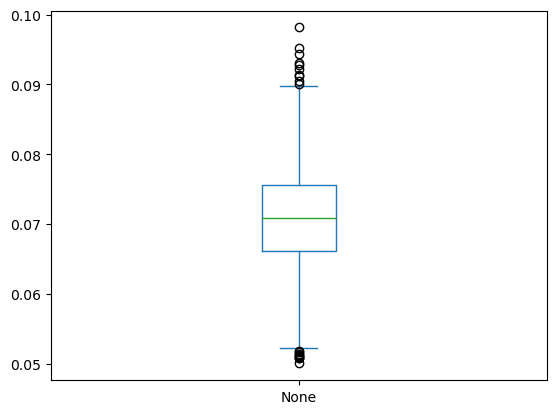

In [111]:
pd.Series(d_dif).plot(kind='box');
# too many outliers

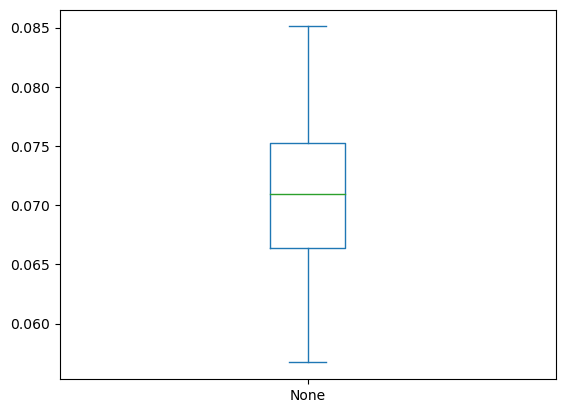

In [112]:
# Croping outliers z-score > 2

mask = pd.Series(d_dif)[np.abs(stats.zscore(pd.Series(d_dif)) ) > 2].index
dif_croped = pd.Series(d_dif).drop(index = mask) 
pd.Series(dif_croped).plot(kind='box');

In [113]:
# определяем 95% доверительный интервал
confidence_interval = pd.Series(dif_croped).quantile([0.025, 0.975])
confidence_interval

0.025    0.058625
0.975    0.082852
dtype: float64

In [ ]:
sem_of_df = death_rates_after.death_rate.std()/np.sqrt(death_rates_after.shape[0]) # sem of data from death_rates_after
sem = death_rates_after.death_rate.std()/np.sqrt(bstrap_iter)

# CI = stats.norm.interval(confidence= 0.95, loc= np.mean(d_dif), scale= sem)
CI = stats.norm.interval(confidence= 0.95, loc= death_rates_after.death_rate.mean(), scale= sem)
# print(f' mean: {pd.Series(d_dif).mean():.05f}, CI: {CI}')
print(f' mean: {pd.Series(death_rates_after.death_rate.mean()).mean():.05f}, CI: {CI}')

`stats.bootstrap` (scipy)

In [121]:
bootstrap_ci_before = stats.bootstrap((death_rates_after.query('important_date == "before"').death_rate,), np.mean, confidence_level=0.90)
bootstrap_ci_before.confidence_interval

ConfidenceInterval(low=0.08133866094953042, high=0.10246334643412638)

In [122]:
bootstrap_ci_after = stats.bootstrap((death_rates_after.query('important_date == "after"').death_rate,), np.mean, confidence_level=0.90)
bootstrap_ci_after.confidence_interval

ConfidenceInterval(low=0.015819657130521223, high=0.02573216546234746)

In [118]:
bootstrap_ci_all= stats.bootstrap((death_rates_after.death_rate,), np.mean, confidence_level=0.95, method= 'percentile')
bootstrap_ci_all.confidence_interval

ConfidenceInterval(low=0.06431193306880831, high=0.08728453670735145)

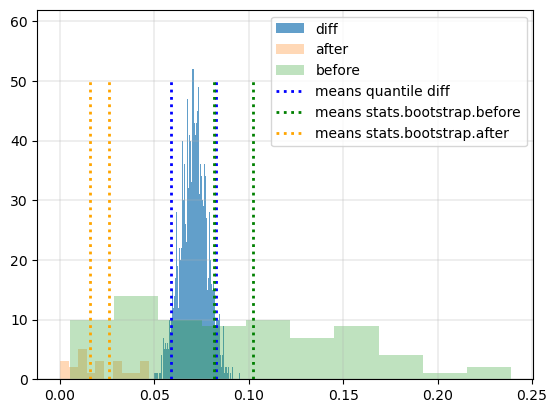

In [142]:
pd.Series(d_dif).hist(bins=200, label= 'diff',alpha=0.7)
death_rates_after.query('important_date == "after"').death_rate.hist(bins=10, alpha=0.3, label= 'after')
death_rates_after.query('important_date == "before"').death_rate.hist(bins=10, alpha=0.3, label= 'before')
plt.vlines(x=confidence_interval, ymin=0, ymax=50, colors='b', ls=':', lw=2, label= 'means quantile diff') 
# plt.vlines(x=CI, ymin=0, ymax=100, colors='r', ls=':', lw=2, label= 'scipy.norm.interval') 
plt.vlines(x=bootstrap_ci_before.confidence_interval, ymin=0, ymax=50, colors='g', ls=':', lw=2, label= 'means stats.bootstrap.before') 
plt.vlines(x=bootstrap_ci_after.confidence_interval, ymin=0, ymax=50, colors='orange', ls=':', lw=2, label= 'means stats.bootstrap.after') 
# plt.vlines(x=bootstrap_ci_all.confidence_interval, ymin=0, ymax=150, colors='r', ls=':', lw=2, label= 'stats.bootstrap.all') 
plt.grid(linewidth=0.3)
plt.legend();

`mannwhitneyu` (distribution is not normal)

In [145]:
res = stats.mannwhitneyu(death_rates_after.query('important_date == "before"').death_rate, death_rates_after.query('important_date == "after"').death_rate)
res

MannwhitneyuResult(statistic=1505.0, pvalue=1.2560263842073473e-08)

Какой должен быть доверительный интервал, чтобы мы сочли случайными изменения после практик, введенных Земмельвейсом?


Если бы CI разницы средних включал 0, то мы бы сочли изменения `случайными`


Что мы, возможно, не учли?

Открытие Земмельвейса опровергало сразу несколько догм, распространённых в медицине того времени, большинство коллег категорически отказывались внедрять его практику, а начальство усматривало в нём только угрозу своему положению.

Из-за сопротивления научного сообщества у Земмельвейса случился нервный срыв и развилась депрессия. В 1865 году сорокасемилетнего Земмельвейса без его согласия, обманом госпитализировали в психиатрическую лечебницу, где через две недели он умер от побоев, нанесённых ему сотрудниками клиники. 